In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math 
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2,F1,F2,m1,m2,w1,w2,]
    """
    #donde k son las constantes del resorte, L las longitudes de este, b los coeficientes de fricción
    #F las fuerzas aplicadas a los resortes, w la frecuencia de estos, y m los coeficientes no lineales 
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, F1, F2, n1, n2, w1, w2  = p
    # Create f = (x1',y1',x2',y2'):
    #y1 y y2 son las segundas derivadas
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) + n1*x1*(x1*x1) + n2*(x1 - x2)**3 + F1*math.cos(w1*t)  / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) + n2*(x2 - x1)**3 + F2*math.cos(w2*t)  / m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

#Parametros para el ejemplo 4.1
# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = (2/5)
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = (1/10)
b2 = (1/5)
#Fuerzas aplicadasw
F1 = (1/3)
F2 = (1/5)
#Valores no lineales 
n1 = (1/6)
n2 = (1/10)
#frecuencias w
w1 = 1.0
w2 = (3/5) 

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0


# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 1500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, F1, F2, n1, n2, w1, w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springspart2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print  ( t1, w1[0], w1[1], w1[2], w1[3], file=f )

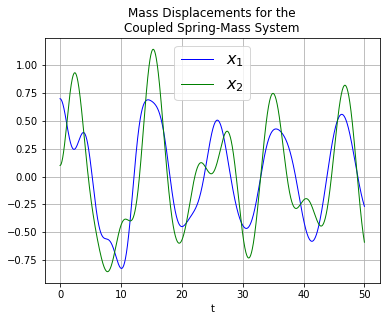

In [3]:
# Plot the solution that was generated
#Ejemplo 4.1 del archivo 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline 
t, x1, xy, x2, y2 = loadtxt('two_springspart2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
# hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs.png', dpi=100)

(-0.90225599797864997,
 0.77629790466564996,
 -0.52707077144134995,
 0.69455044091634999)

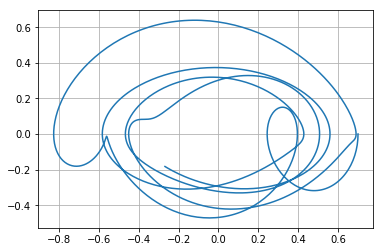

In [4]:
import matplotlib
plot(x1,xy)
grid(True)
matplotlib.pyplot.axis('on')

(-0.95524030764955004,
 1.2442741760785501,
 -0.73512919680184996,
 0.77001096275085001)

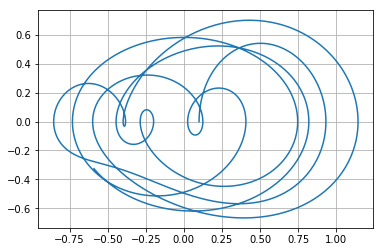

In [5]:
import matplotlib
plot(x2,y2)
grid(True)
matplotlib.pyplot.axis('on')

(-0.90225599797864997,
 0.77629790466564996,
 -0.95524030764955004,
 1.2442741760785501)

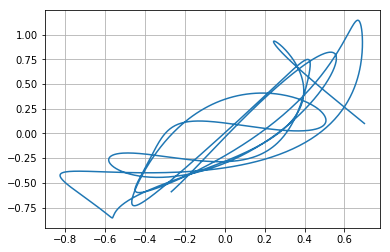

In [6]:
import matplotlib
plot(x1,x2)
grid(True)
matplotlib.pyplot.axis('on')